In [495]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [496]:
df=pd.read_csv("IRIS.csv",delimiter=',')
pd.date_range

<function pandas.core.indexes.datetimes.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize: 'bool' = False, name: 'Hashable | None' = None, inclusive: 'IntervalClosedType' = 'both', *, unit: 'str | None' = None, **kwargs) -> 'DatetimeIndex'>

In [497]:
df=pd.DataFrame(df)
df=df.sort_values(by='species')
dt=df
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa


In [498]:
check = df['species'][0]
lst_p = []
lst_s = []
final_list_s = []
final_list_p = []
species=[df['species'][0]]
for i in range(len(df['species'])):
   
    if df['species'][i] == check:
        lst_p.append(df["petal_length"][i])
        lst_s.append(df["sepal_length"][i])
    else:
        final_list_p.append(lst_p)
        final_list_s.append(lst_s)
        lst_p = [df["petal_length"][i]]
        lst_s = [df["sepal_length"][i]]
        check = df['species'][i]
        species.append(df['species'][i])

# Append the last species' data
final_list_p.append(lst_p)
final_list_s.append(lst_s)


In [499]:
data=np.array(final_list_p[0])


In [500]:
from matplotlib import pyplot as pt

# Exploratory Data Analysis for iris dataset
## Normal Distriution of Iris Dataset

In [501]:
mean=data.mean()
std=data.std()
x = np.linspace(mean - 3*std, mean + 3*std, 50)
# PDF for continious interval in normal distribution 
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(- (x - mean)**2 / (2 * std**2))



<function matplotlib.pyplot.show(close=None, block=None)>

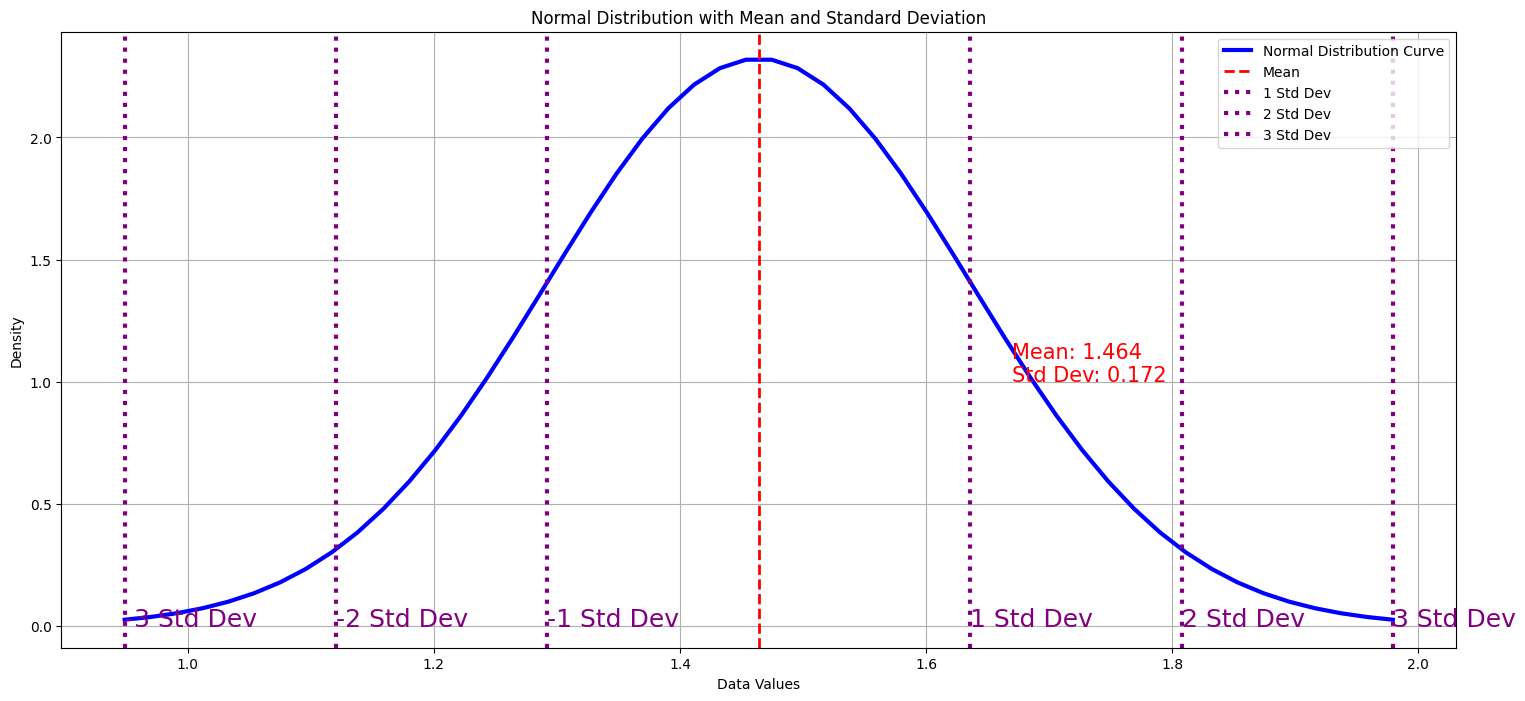

In [502]:

pt.figure(figsize=(18,8))
pt.plot(x,y, color='blue', linewidth=3, label='Normal Distribution Curve')
#pt.hist(data, bins=10, density=True, alpha=0.3, color='g', label='Data Histogram')
pt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
for i in range(1, 4):
    pt.axvline(mean + i * std, color='purple', linestyle='dotted', linewidth=3, label=f'{i} Std Dev')
    pt.axvline(mean - i * std, color='purple', linestyle='dotted', linewidth=3)


for i in range(1, 4):
    pt.text(mean + i * std, 0, f'{i} Std Dev', fontsize=18, color='purple')
    pt.text(mean - i * std, max(y) * 0, f'-{i} Std Dev', fontsize=18, color='purple')
    
pt.text(mean+1.2*std,1, f'Mean: {mean}\nStd Dev: {std:.3f}', fontsize=15, color='red')

pt.title('Normal Distribution with Mean and Standard Deviation')
pt.xlabel('Data Values')
pt.ylabel('Density')
pt.legend()
pt.grid(True)
pt.show

# Logistic Regression using dataset in SKLearn Library

In [503]:
df=load_iris()

In [504]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [505]:
xtrainn,xtest,ytrain,ytest=train_test_split(df.data,df.target,test_size=0.2,random_state=10)

In [506]:
model=LogisticRegression()

In [507]:
model.fit(xtrainn,ytrain)

LogisticRegression()

In [508]:
wrong=0
ind=model.predict(xtest)
print("Actual\t\t:\tPredicted")
for i,j in zip(ytest,ind):
    print(f"{df.target_names[i]:^8}\t:\t{df.target_names[j]}")
    if i!=j:
        wrong+=1
    

Actual		:	Predicted
versicolor	:	versicolor
virginica	:	virginica
 setosa 	:	setosa
versicolor	:	versicolor
 setosa 	:	setosa
versicolor	:	versicolor
versicolor	:	versicolor
versicolor	:	versicolor
 setosa 	:	setosa
versicolor	:	versicolor
versicolor	:	versicolor
virginica	:	virginica
versicolor	:	versicolor
 setosa 	:	setosa
 setosa 	:	setosa
virginica	:	virginica
versicolor	:	versicolor
 setosa 	:	setosa
 setosa 	:	setosa
 setosa 	:	setosa
virginica	:	virginica
virginica	:	virginica
virginica	:	virginica
 setosa 	:	setosa
versicolor	:	versicolor
 setosa 	:	setosa
versicolor	:	versicolor
versicolor	:	versicolor
versicolor	:	versicolor
virginica	:	virginica


In [509]:
model.score(xtest,ytest)

1.0

In [510]:
wrong

0

# Logistic Regression using csv file 

In [511]:
dt

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica


In [512]:
model_2=LogisticRegression()
x=['sepal_length','sepal_width','petal_length','petal_width']

x1=dt[x]

In [513]:
xtr,xt,ytr,yt=train_test_split(dt[x],dt.species,test_size=0.2,random_state=1)

In [514]:
model_2.fit(xtr,ytr)

LogisticRegression()

In [515]:
model_2.predict(xt)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [516]:
model_2.score(xt,yt)

1.0

In [517]:
wrong=0
ind=model_2.predict(xt)
print("Actual\t\t:\tPredicted")
for i,j in zip(yt,ind):
    print(f"{i:^8}\t:\t{j}")
    if i!=j:
        wrong+=1

Actual		:	Predicted
Iris-setosa	:	Iris-setosa
Iris-versicolor	:	Iris-versicolor
Iris-versicolor	:	Iris-versicolor
Iris-setosa	:	Iris-setosa
Iris-virginica	:	Iris-virginica
Iris-versicolor	:	Iris-versicolor
Iris-virginica	:	Iris-virginica
Iris-setosa	:	Iris-setosa
Iris-setosa	:	Iris-setosa
Iris-virginica	:	Iris-virginica
Iris-versicolor	:	Iris-versicolor
Iris-setosa	:	Iris-setosa
Iris-virginica	:	Iris-virginica
Iris-versicolor	:	Iris-versicolor
Iris-versicolor	:	Iris-versicolor
Iris-setosa	:	Iris-setosa
Iris-versicolor	:	Iris-versicolor
Iris-versicolor	:	Iris-versicolor
Iris-setosa	:	Iris-setosa
Iris-setosa	:	Iris-setosa
Iris-versicolor	:	Iris-versicolor
Iris-versicolor	:	Iris-versicolor
Iris-versicolor	:	Iris-versicolor
Iris-setosa	:	Iris-setosa
Iris-virginica	:	Iris-virginica
Iris-versicolor	:	Iris-versicolor
Iris-setosa	:	Iris-setosa
Iris-setosa	:	Iris-setosa
Iris-versicolor	:	Iris-versicolor
Iris-virginica	:	Iris-virginica


# Classification using Random Forest Classifier

In [518]:
from sklearn.ensemble import RandomForestClassifier

In [519]:
model_3=RandomForestClassifier(n_estimators=10,random_state=1)

In [520]:
model_3.fit(xtr,ytr)

RandomForestClassifier(n_estimators=10, random_state=1)

In [521]:
model_3.score(xt,yt)

1.0

# <center> Unsupervised Learning 

### Clustering using k_means

In [522]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [523]:
x=dt[['petal_length','petal_width']]
x
scaler=MinMaxScaler()
# scaler.fit(x[['petal_length']])
# x['petal_length']=scaler.transform(x['petal_length'])



In [524]:

from matplotlib import pyplot as ppt
x

,petal_length,petal_width
0,1.4,0.2
27,1.5,0.2
28,1.4,0.2
29,1.6,0.2
30,1.6,0.2
...,...,...
119,5.0,1.5
120,5.7,2.3
121,4.9,2.0
111,5.3,1.9


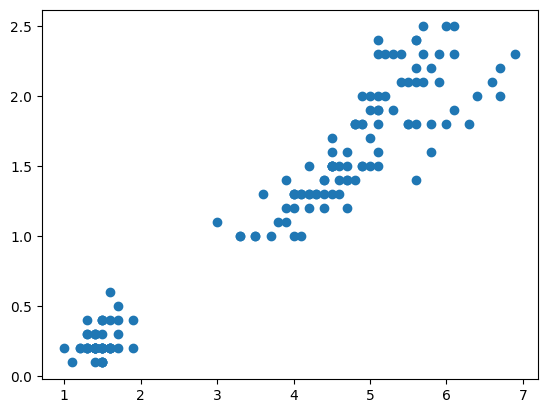

In [525]:
ppt.scatter(dt.petal_length,dt.petal_width)

In [526]:
kcheck=range(1,10)
sse=[]

In [527]:
for i in kcheck:
    km=KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    
     

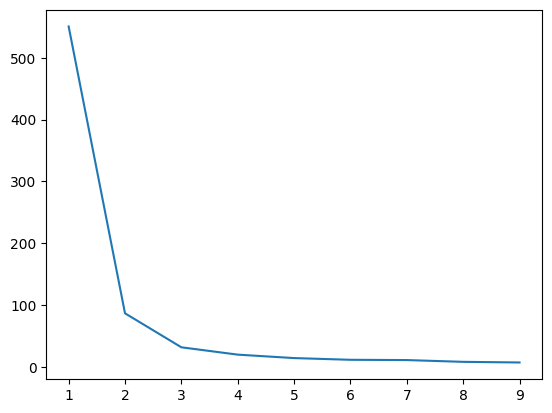

In [528]:
ppt.plot(kcheck,sse)

In [529]:
km=KMeans(n_clusters=3)

In [530]:
cluster=km.fit_predict(x)
x['Cluster']=cluster
x


C:\Users\TOSHIBA PC\AppData\Local\Temp\ipykernel_7528\1041458441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster']=cluster


,petal_length,petal_width,Cluster
0,1.4,0.2,0
27,1.5,0.2,0
28,1.4,0.2,0
29,1.6,0.2,0
30,1.6,0.2,0
...,...,...,...
119,5.0,1.5,2
120,5.7,2.3,1
121,4.9,2.0,1
111,5.3,1.9,1


In [531]:
df0=x[x.Cluster==0]
df1=x[x.Cluster==1]
df2=x[x.Cluster==2]
km.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

C:\Users\TOSHIBA PC\AppData\Local\Temp\ipykernel_7528\3543281167.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ppt.legend()


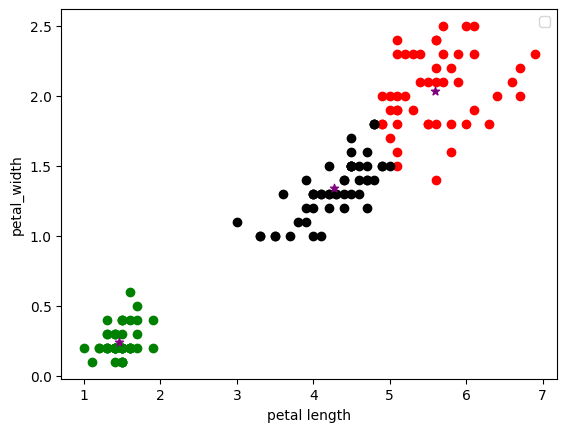

In [532]:
ppt.scatter(df0['petal_length'],df0['petal_width'],color='green')
ppt.scatter(df1['petal_length'],df1['petal_width'],color='red')
ppt.scatter(df2['petal_length'],df2['petal_width'],color='black')
ppt.legend()
ppt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color="purple")
ppt.xlabel('petal length')
ppt.ylabel("petal_width")
ppt.show()

## Hyperparameter Tuning of Iris dataset Gridsearch CV

In [533]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV


In [534]:
hp=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,50,100]},cv=5,return_train_score=False)

In [535]:
hp.fit(x1,dt.species)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100]})

In [536]:
# df=pd.DataFrame(hp.cv_results_)
# df[['param_C','param_kernel','mean_test_score']]

In [537]:
# hp.best_params_

In [538]:
rs=RandomizedSearchCV(SVC(gamma='auto'),{"C":[1,2,3,4,5,6],'kernel': ['linear','rbf']},cv=5,n_iter=2,return_train_score=False)

In [539]:
rs.fit(x1,dt.species)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6],
                                        'kernel': ['linear', 'rbf']})

In [540]:
df=pd.DataFrame(rs.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,2,rbf,0.98
1,2,linear,0.98


In [541]:
[range(1,6)]

[range(1, 6)]

In [542]:
model_param={
    'SVM':{
    'model': SVC(gamma='auto'),
    'param':{
        'C':[1,5,10,20],
        'kernel':['rbf','linear']
    }
},'RandomForestClassifier':{
    'model':RandomForestClassifier(),
    "param":{'n_estimators':[10,50,100]}
},'LogisticRegression':{
    'model':LogisticRegression(solver='liblinear',multi_class='auto'),
    'param':{'C':[1,5,10,20]}
}
    }

In [543]:
score=[]
for model_names,mp in model_param.items():
    gs=GridSearchCV(mp['model'],mp['param'],cv=5,return_train_score=False)
    gs.fit(x1,dt.species)
    gs.best_score_
    score.append({
        'Model Name':model_names,
        'Best_param':gs.best_params_,
        'Best_score':gs.best_score_

    })
  

C:\Users\TOSHIBA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\TOSHIBA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\TOSHIBA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was depre

In [544]:
pd.DataFrame(score)

,Model Name,Best_param,Best_score
0,SVM,"{'C': 1, 'kernel': 'linear'}",0.980000
1,RandomForestClassifier,{'n_estimators': 100},0.966667
2,LogisticRegression,{'C': 10},0.966667


# Classification using KNN 

In [545]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [546]:
lb=LabelEncoder()

In [547]:
dt['species']=lb.fit_transform(dt['species'])

In [548]:
d1=dt[dt.species==0]
d2=dt[dt.species==1]
d3=dt[dt.species==2]


C:\Users\TOSHIBA PC\AppData\Local\Temp\ipykernel_7528\2315643483.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ppt.legend()


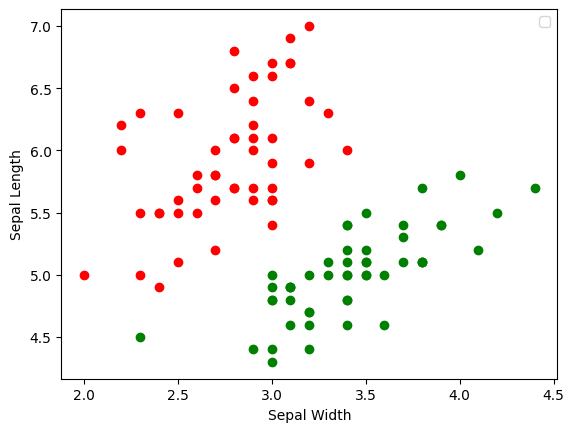

In [549]:
ppt.scatter(d1['sepal_width'],d1['sepal_length'],c='green')
ppt.scatter(d2['sepal_width'],d2['sepal_length'],c='red')
ppt.xlabel('Sepal Width')
ppt.ylabel('Sepal Length')
ppt.legend()
ppt.show()



In [550]:
y=dt.species
x=dt.drop(['species'],axis='columns')
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
27,5.2,3.5,1.5,0.2
28,5.2,3.4,1.4,0.2
29,4.7,3.2,1.6,0.2
30,4.8,3.1,1.6,0.2
...,...,...,...,...
119,6.0,2.2,5.0,1.5
120,6.9,3.2,5.7,2.3
121,5.6,2.8,4.9,2.0
111,6.4,2.7,5.3,1.9


In [560]:
train_x,xt,train_y,yt=train_test_split(x,y,test_size=0.4,random_state=1)

In [552]:
md=KNeighborsClassifier(n_neighbors=3)



In [561]:
md.fit(train_x,train_y)
md.score(xt,yt)

0.95

In [564]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [566]:
confusion_matrix(md.predict(xt),yt)
print(classification_report(md.predict(xt),yt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      0.95      0.93        20
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

